# Exploratory Data Analysis

Our brains were not made to effectively understand trends in raw data.  Staring at a grid of numbers usually leads to few, if any, ephiphanies. 

Instead, we must remember that we are visual creatures!  We need to visualize the data so that we can tap into the pattern recognition engine that is our brains.


## A Simple Example

Anscombe's Quartet, constructed by the statistician Francis Anscobme in 1973.

![anscombes_quartet.png](https://miro.medium.com/max/1166/1*JyDU5qgFA-S2XOFBah9YcQ.png)

![Anscombes quartet](https://miro.medium.com/max/1400/1*lZAlx4qLO4cHc5MERinBiw.png)

## Let's Load a Data Set and Explore

In [ ]:
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Pause Before Visualizing

Whenever we have a new data set, we have to answer some of the basic questions first:

- Who made this data set?
  - Why did they make it?
  - When did they make it?
- How big is the data set?
  - If the data set is too large to be workable, we can construct a much smaller sample set
  - All our analysis can be done initially on the sample set before further exploring the full data set
- What do the different fields mean?
  - Has the data set already been cleaned?
  - Compute the basic descriptive stats for each column
    - Make sure the ranges and means all make sense
  - Compute the correlations, see if anything stands out

## Where does our data come from?

This data set comes from an academic paper, titled [*Modeling wine preferences by data mining from physicochemical properties*](https://doi.org/10.1016/j.dss.2009.05.016), by Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, and José Reisa, and was published in 2009.

From the paper:

> This study will consider vinho verde, a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). This wine accounts for 15% of the total Portuguese production [8], and around 10% is exported, mostly white wine. In this work, we will analyze the two most common variants, white and red (rosé is also produced), from the demarcated region of vinho verde. The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the official certification entity (CVRVV). The CVRVV is an inter-professional organization with the goal of improving the quality and marketing of vinho verde. The data were recorded by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis. Each entry denotes a given test (analytical or sensory) and the final database was exported into a single sheet (.csv).


#### Attributes  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
12 - quality (score between 0 and 10)



In [ ]:
# Basic stats can be computed using the .describe() function 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Compute the pairwise correlation with the .corr() function
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Different Visualization Goals

When we are creating visualizations of data, our goals will not always be the same.  In general, there are three main goals we might have:

1. Exploratory Data Analysis
  - These plots are made **quickly** so we can better understand the data
  - They often rely upon default values for plotting functions (very little customization)
  - Jupyter Notebooks or Excel documents work well for this purpose

2. Publication Quality Visualizations
  - Plots that are intended for showing others: 
    - Published Papers
    - Presentations
    - Homework
  - Plots that are "professional"
  - These plots are high quality, high dots-per-inch (DPI), and well annotated
  - Excel usually is **not** able to generate these types of graphics

3. Interactive Visualizations for Sharing
  - Not everyone has the skill to manipulate a data set, but we want them to also have the ability to explore the data
  - Typically referred to as *dashboards*, these interactive graphics make playing with the data easy and intuitive
  - They are not made automatically; it takes human work to create them
  - There are several different platforms to make dashboards
    - In this course, we will explore [Plotly Dash](https://dash.gallery/Portal/)

## Our Tools

There are likely hundreds of different plotting utilities available to make reasonable quality plots, from Excel to Microsoft Paint.  We will primarily use three different toolboxes for making figures in this class:

1. [Matplotlib](https://matplotlib.org/stable/gallery/index.html)
  - This is a mature and robust plotting library in Python
  - Essentially any type of non-interactive plot can be created
  - Free and Open Source, made in 2003 and under active development the entire time
  - We will primarily use the PyPlot sub-package
    - This allows us to make plots and figures procedurally


2. [Seaborn](https://seaborn.pydata.org/examples/index.html)
  - Built on top of Matplotlib, so same limitations and features
  - Uses an easier interface for plotting data sets from Pandas
  - Has it's own distinct visual style
  - Automatically plot lines of best fit
  - Better defaults for viewing distributions


3. [Plotly](https://plotly.com/python/plotly-express/)
  - Independent of Matplotlib (and thus Seaborn)
  - Allows for interactive graphics in a web-browser
  - Has a commericial enterprise attached to it (dash cloud), but main software is free and open source

We can load these three plotting libraries by the following commands:

In [ ]:
import matplotlib.pyplot as plt # <-- This loads Matplotlib
import seaborn as sns
import plotly.express as px

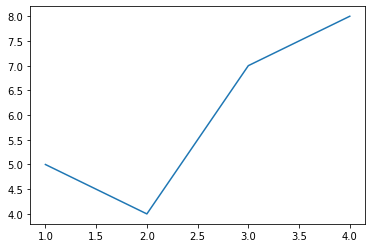

In [ ]:
plt.plot([1,2,3,4], [5,4,7,8])

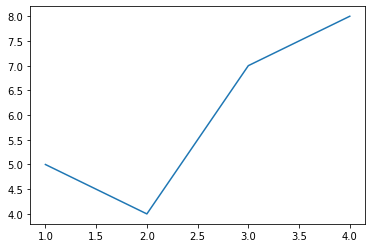

In [ ]:
sns.lineplot(x=[1,2,3,4], y=[5,4,7,8])

In [ ]:
px.line([1,2,3,4],y=[5,4,7,8])